# Neural Network classification in MNIST digits dataset

In [13]:
%pip install tensorflow

import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

Note: you may need to restart the kernel to use updated packages.


In [15]:
# Parámetros de entrenamiento
max_iter = 10000
batch_size = 100

# Cargar MNIST (ya viene con TF2)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizar valores (0-255) → (0-1)
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

# Aplanar imágenes (28x28 → 784)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

# One-hot encoding de las etiquetas
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 16s 1us/step


# Function for Neural Network

In [ ]:
from tensorflow.keras import layers, models, callbacks

# Modelo
model = models.Sequential([
    layers.Dense(512, activation='relu', input_shape=(784,)),
    layers.Dropout(0.3),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

# Compilar
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks para mejor entrenamiento
early_stop = callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_schedule = callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Entrenar
history = model.fit(
    x_train, y_train,
    batch_size=18,
    epochs=30,
    validation_data=(x_test, y_test),
    callbacks=[early_stop, lr_schedule],
    verbose=2
)

# Evaluar
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print(f"✅ Test accuracy: {test_acc:.4f}")


Epoch 1/30
469/469 - 4s - 9ms/step - accuracy: 0.9089 - loss: 0.3017 - val_accuracy: 0.9636 - val_loss: 0.1159 - learning_rate: 0.0010
Epoch 2/30
469/469 - 3s - 7ms/step - accuracy: 0.9617 - loss: 0.1259 - val_accuracy: 0.9736 - val_loss: 0.0843 - learning_rate: 0.0010
Epoch 3/30
469/469 - 3s - 7ms/step - accuracy: 0.9716 - loss: 0.0919 - val_accuracy: 0.9776 - val_loss: 0.0723 - learning_rate: 0.0010
Epoch 4/30
469/469 - 4s - 7ms/step - accuracy: 0.9769 - loss: 0.0737 - val_accuracy: 0.9787 - val_loss: 0.0660 - learning_rate: 0.0010
Epoch 5/30
469/469 - 3s - 7ms/step - accuracy: 0.9816 - loss: 0.0609 - val_accuracy: 0.9796 - val_loss: 0.0650 - learning_rate: 0.0010
Epoch 6/30
469/469 - 3s - 7ms/step - accuracy: 0.9827 - loss: 0.0530 - val_accuracy: 0.9813 - val_loss: 0.0674 - learning_rate: 0.0010
Epoch 7/30
469/469 - 3s - 6ms/step - accuracy: 0.9848 - loss: 0.0483 - val_accuracy: 0.9811 - val_loss: 0.0621 - learning_rate: 0.0010
Epoch 8/30
469/469 - 3s - 7ms/step - accuracy: 0.9859 -

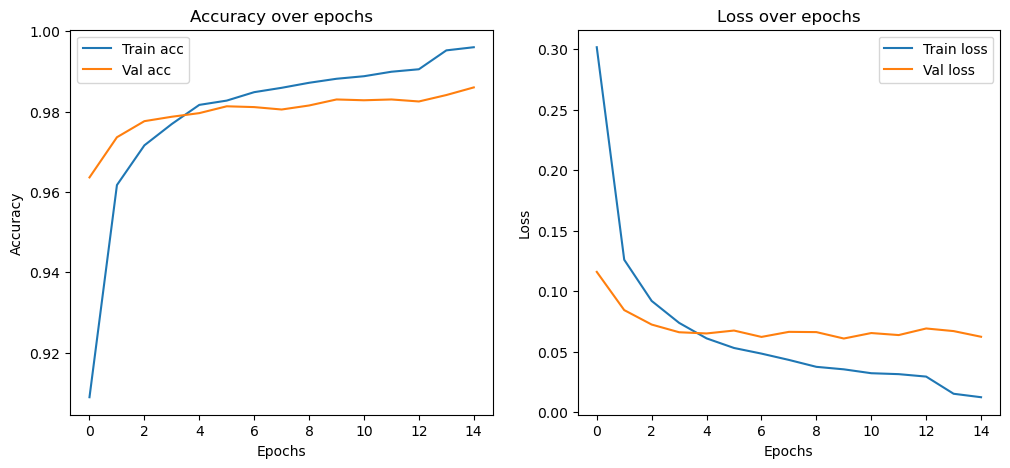

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train acc')
plt.plot(history.history['val_accuracy'], label='Val acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over epochs')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over epochs')

plt.show()


# Matriz de Confusion

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


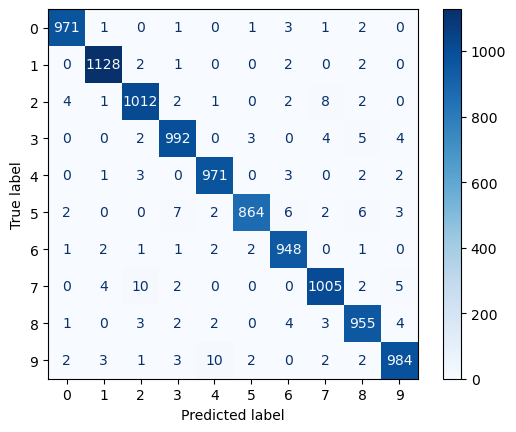

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap="Blues")


# Mostrar ejemplos mal clasificados

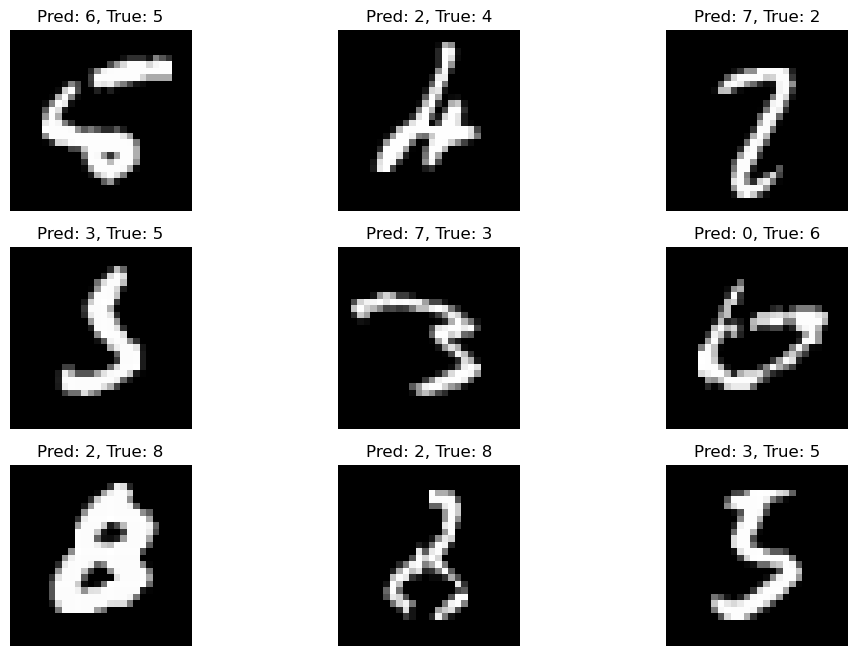

In [24]:
import matplotlib.pyplot as plt

errors = np.where(y_pred_classes != y_true)[0]

plt.figure(figsize=(12,8))
for i, idx in enumerate(errors[:9]):  # mostrar 9 errores
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap="gray")
    plt.title(f"Pred: {y_pred_classes[idx]}, True: {y_true[idx]}")
    plt.axis("off")
plt.show()


In [25]:
model.save("mnist_model.h5")

# Subir la precision

In [30]:
x_train_cnn = x_train.reshape(-1, 28, 28, 1)
x_test_cnn = x_test.reshape(-1, 28, 28, 1)

cnn_model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

cnn_model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
# Entrenar
history_cnn = cnn_model.fit(
    x_train_cnn, y_train,
    epochs=10,
    batch_size=128,
    validation_data=(x_test_cnn, y_test),
    verbose=2
)


Epoch 1/10
469/469 - 10s - 22ms/step - accuracy: 0.9254 - loss: 0.2500 - val_accuracy: 0.9825 - val_loss: 0.0510
Epoch 2/10
469/469 - 9s - 18ms/step - accuracy: 0.9780 - loss: 0.0708 - val_accuracy: 0.9864 - val_loss: 0.0392
Epoch 3/10
469/469 - 8s - 18ms/step - accuracy: 0.9838 - loss: 0.0532 - val_accuracy: 0.9902 - val_loss: 0.0291
Epoch 4/10
469/469 - 8s - 18ms/step - accuracy: 0.9870 - loss: 0.0403 - val_accuracy: 0.9895 - val_loss: 0.0292
Epoch 5/10
469/469 - 8s - 18ms/step - accuracy: 0.9893 - loss: 0.0341 - val_accuracy: 0.9902 - val_loss: 0.0280
Epoch 6/10
469/469 - 9s - 18ms/step - accuracy: 0.9912 - loss: 0.0291 - val_accuracy: 0.9915 - val_loss: 0.0233
Epoch 7/10
469/469 - 8s - 18ms/step - accuracy: 0.9920 - loss: 0.0249 - val_accuracy: 0.9922 - val_loss: 0.0241
Epoch 8/10
469/469 - 9s - 18ms/step - accuracy: 0.9931 - loss: 0.0217 - val_accuracy: 0.9919 - val_loss: 0.0241
Epoch 9/10
469/469 - 8s - 18ms/step - accuracy: 0.9942 - loss: 0.0188 - val_accuracy: 0.9911 - val_loss

In [31]:
# Evaluar
test_loss, test_acc = cnn_model.evaluate(x_test_cnn, y_test, verbose=0)
print(f"✅ Test accuracy CNN: {test_acc:.4f}")

✅ Test accuracy CNN: 0.9930


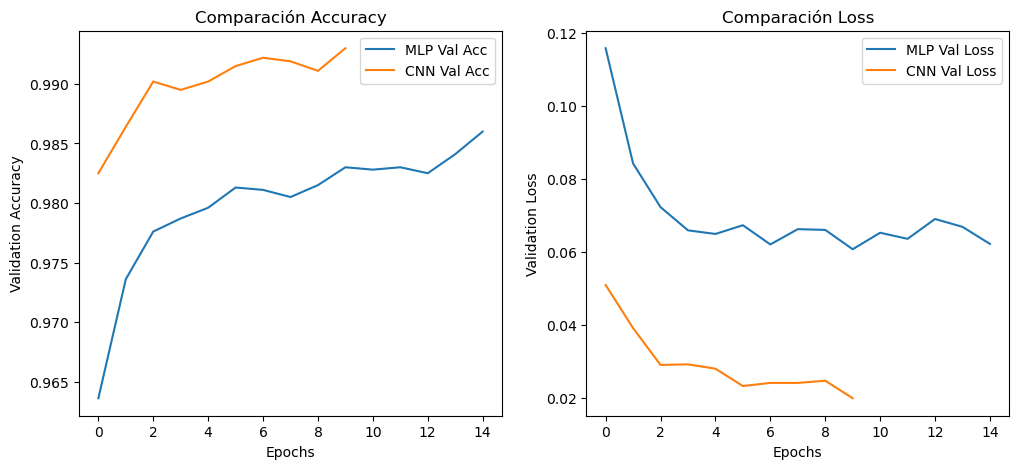

In [32]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['val_accuracy'], label='MLP Val Acc')
plt.plot(history_cnn.history['val_accuracy'], label='CNN Val Acc')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.title('Comparación Accuracy')

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['val_loss'], label='MLP Val Loss')
plt.plot(history_cnn.history['val_loss'], label='CNN Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Validation Loss')
plt.legend()
plt.title('Comparación Loss')

plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Total de errores: 70 de 10000 ejemplos (0.70%)


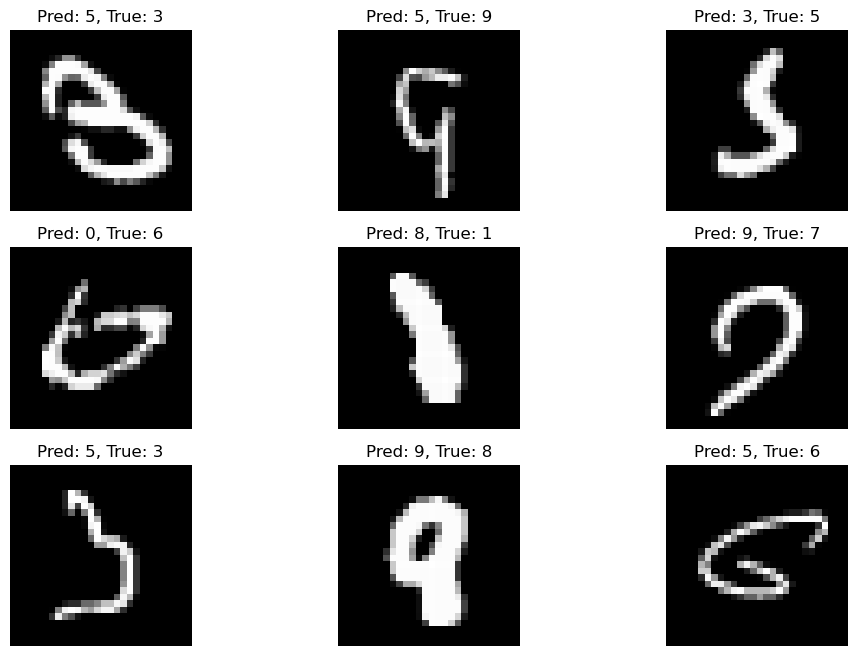

In [33]:
# Predicciones con la CNN
y_pred_cnn = cnn_model.predict(x_test_cnn)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)
y_true_cnn = np.argmax(y_test, axis=1)

# Índices de errores
errors = np.where(y_pred_classes_cnn != y_true_cnn)[0]

print(f"Total de errores: {len(errors)} de {len(y_test)} ejemplos ({len(errors)/len(y_test)*100:.2f}%)")

# Mostrar algunos errores
plt.figure(figsize=(12,8))
for i, idx in enumerate(errors[:9]):  # Mostrar 9 errores
    plt.subplot(3,3,i+1)
    plt.imshow(x_test_cnn[idx].reshape(28,28), cmap="gray")
    plt.title(f"Pred: {y_pred_classes_cnn[idx]}, True: {y_true_cnn[idx]}")
    plt.axis("off")
plt.show()
